In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1. Reading the data file: titanic.csv and storing it in a Pandas Dataframe**

In [104]:
df=pd.read_csv('titanic.csv')
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


**2. Column names present in the dataframe**

In [106]:
#To know the names
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**3. The unique values in each column**

In [107]:
df.nunique()

Unnamed: 0     891
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

**4 a. Using the groupby() function to understand the number of survivors by sex**

In [108]:
#survival by passenger based on gender then count how many survived
grouped_data=df.groupby(['sex','survived'])['survived'].count()
grouped_data

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

**4 b. Next, using the groupby() function to understand the number of survivors by passenger class**

In [109]:
#survival by passenger class
class_survived_counts=df.groupby(['pclass','survived'])['survived'].count()
class_survived_counts

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

**4 c. Finally using the groupby() function to see the town the passenger embarked from and then the passenger class**

In [110]:
#embarkation port influenced survival chances across diff pclasses
embarked_class_survived_counts=df.groupby(['embark_town','pclass','survived'])['survived'].count()
embarked_class_survived_counts

embark_town  pclass  survived
Cherbourg    1       0            26
                     1            59
             2       0             8
                     1             9
             3       0            41
                     1            25
Queenstown   1       0             1
                     1             1
             2       0             1
                     1             2
             3       0            45
                     1            27
Southampton  1       0            53
                     1            74
             2       0            88
                     1            76
             3       0           286
                     1            67
Name: survived, dtype: int64

**5. A plain count plot graph that  plots a common Y(Number of Passengers axis) for both male and female gender to illustrate the _higher ratio of male deaths versus females_**

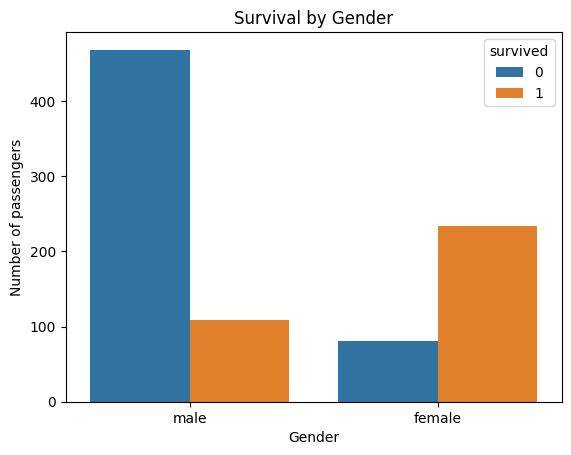

In [111]:
sns.countplot(x="sex",hue="survived",data=df)
plt.xlabel("Gender")
plt.ylabel("Number of passengers")
plt.title("Survival by Gender")
plt.show()

**6. Again, a common Y axis(Number of Passengers) plotted against the passenger classes 1,2 and 3 on X, _show the higher mortality as we go down the class_**

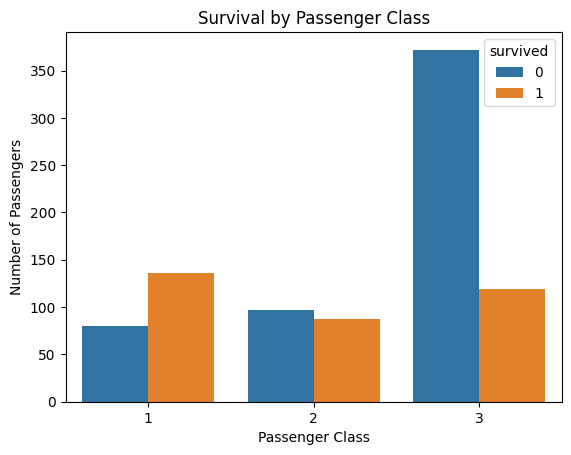

In [112]:
sns.countplot(x="pclass",hue="survived",data=df)
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Survival by Passenger Class")
plt.show()

**7. A categorical plot to allow a tiered illustration: first among passenger classes within which we study the different embark_towns' survival statistics.**

**_Southampton had the most embarkers across classes(particularly the third class) while Queenstown had a minor crowd especially in the first and second classes_**

c:\Users\AMIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


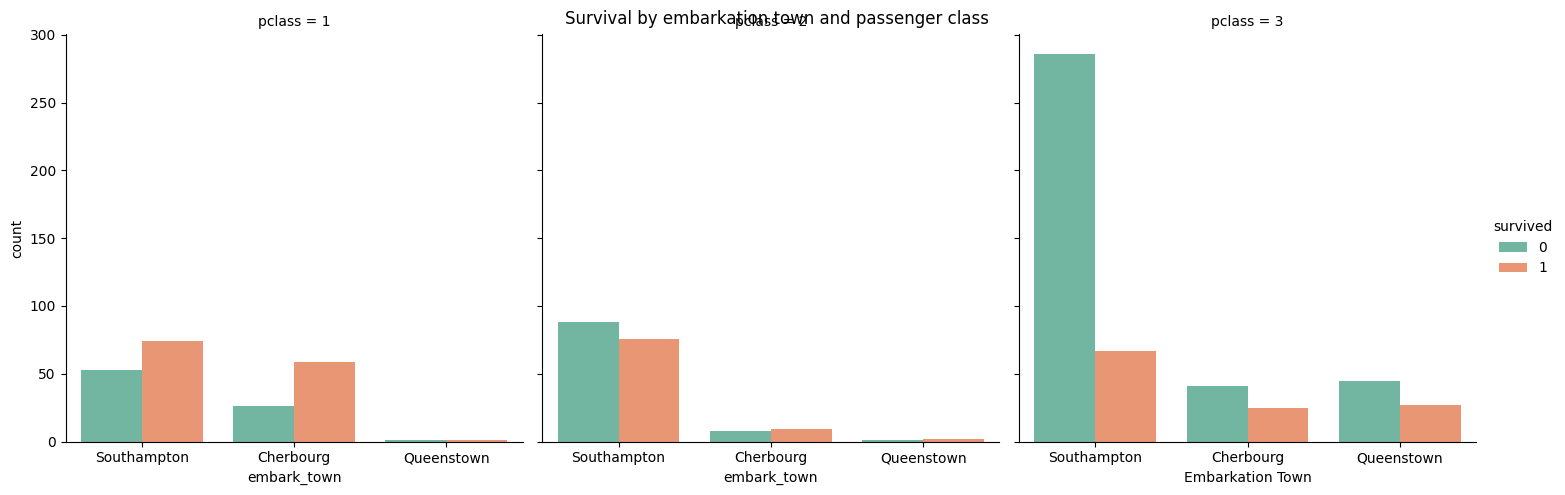

In [113]:
#Embarkation port,class and survival using catplot
sns.catplot(x="embark_town",hue="survived",col="pclass",data=df,kind="count",palette="Set2")
plt.xlabel("Embarkation Town")
plt.ylabel("Number of Passengers")
plt.suptitle("Survival by embarkation town and passenger class")
plt.show()

In [114]:
#Describe function generates key statistical info
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
df['embark_town'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object

In [116]:
#Important data manipulation technique: Data Cleaning and trasformation
#Input missing values, encoding categorical variables etc to imporove data quality for analysis

df['adult_male'].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [117]:
df['adult_male'].replace({True:1,False:0},inplace=True)
df

C:\Users\AMIT\AppData\Local\Temp\ipykernel_1844\2815228060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['adult_male'].replace({True:1,False:0},inplace=True)
C:\Users\AMIT\AppData\Local\Temp\ipykernel_1844\2815228060.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['adult_male'].repla

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,True


**DATA CLEANING: REMOVING NULL VALUES ACROSS COLUMNS**

In [118]:
df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Age- The decision**

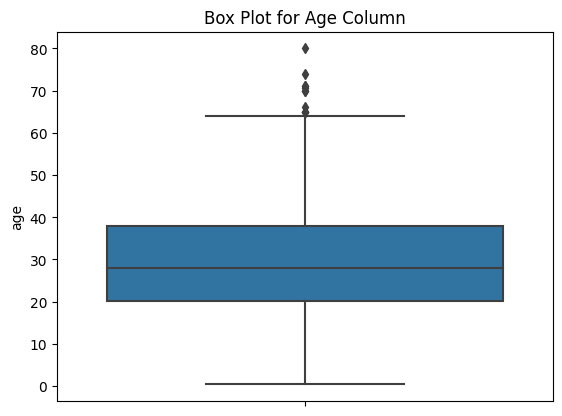

In [119]:
#Age
#Decision:deletion rows OR Impute(and if so, which measure of central tendency)

#visualise using box plot so as to choose imputation method
sns.boxplot(y='age',data=df)
plt.title('Box Plot for Age Column')
plt.show()

In [120]:
#the outliers show that we may need to use median instead of mean which is susceptible to outlier bias
df['age']=df['age'].fillna(df['age'].median())


**Similary so for deck.**

In [121]:
#Deck
#Deck is a categorical data so we cannot use mean or median
# we will use the most freq occuring deck val to fillna
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [122]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])

**Even for embark_town**

In [123]:
#Embark_Town
#since there are only 2 missing vals its better to drop those rows
#rather than risk inaccurate oputcomes by imputing with mode
df.dropna(subset=['embark_town'],inplace=True)

**Dropping the columns with na vals in embark_town automatically means even embarked has 0 isnull values**

In [124]:
df.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [125]:
df.rename(columns={"deck":"cabin"},inplace=True)
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,cabin,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,C,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,C,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,C,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,True
888,888,0,3,female,28.0,1,2,23.4500,S,Third,woman,0,C,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,True


**Histogram helps calculate total(frequency).**

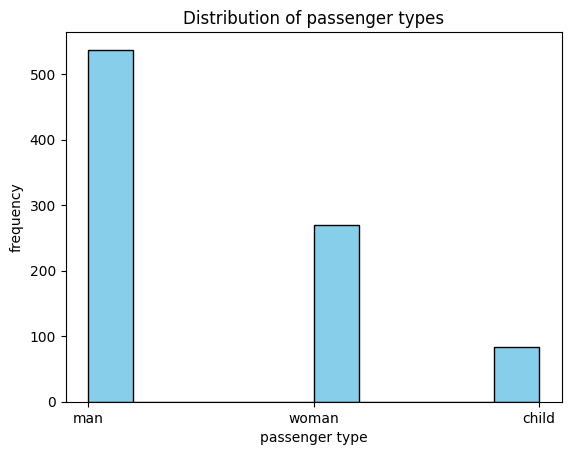

In [126]:
plt.hist(df['who'],color='skyblue',edgecolor='black')
plt.xlabel('passenger type')
plt.ylabel('frequency')
plt.title('Distribution of passenger types')
plt.show()

**Correlation Matrix between different columns of the dataset.**

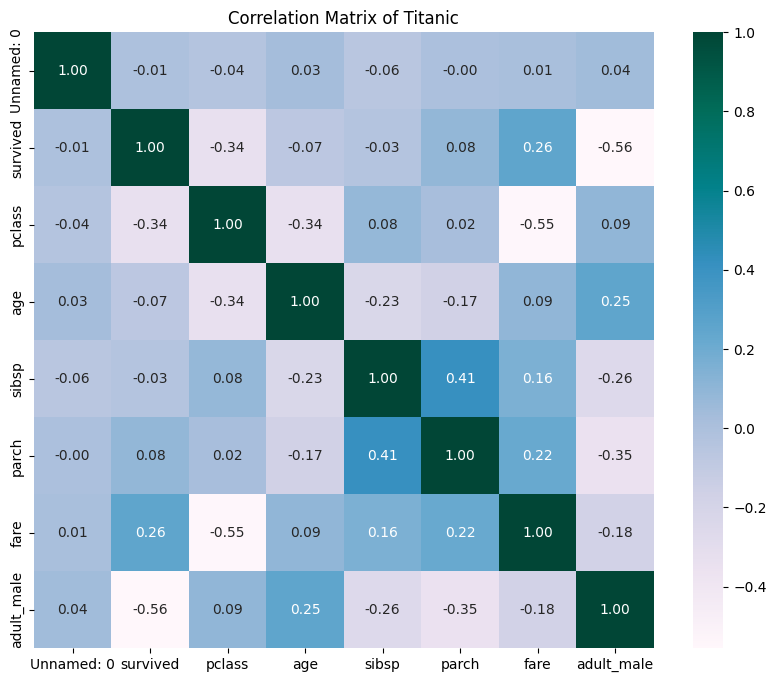

In [127]:
#Correlation Matrix
numeric_df=df.select_dtypes(include=['int64','float64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt=".2f")
plt.title("Correlation Matrix of Titanic")
plt.show()